In [1]:
from transformers import GPT2LMHeadModel, AutoTokenizer

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
print(sd_hf["transformer.wpe.weight"].view(-1)[:20])
print(sd_hf["transformer.h.0.attn.c_attn.weight"].shape)


tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])
torch.Size([768, 2304])


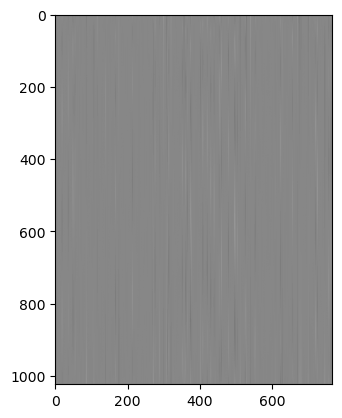

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

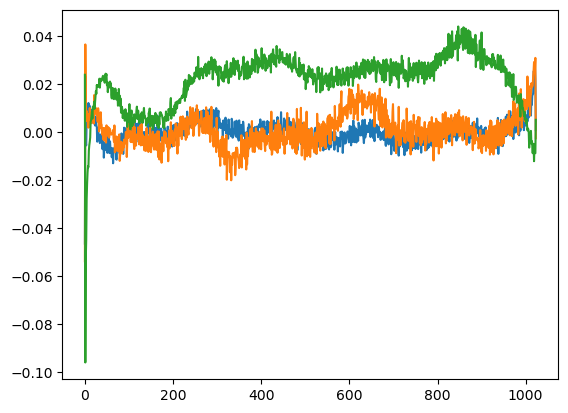

In [5]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

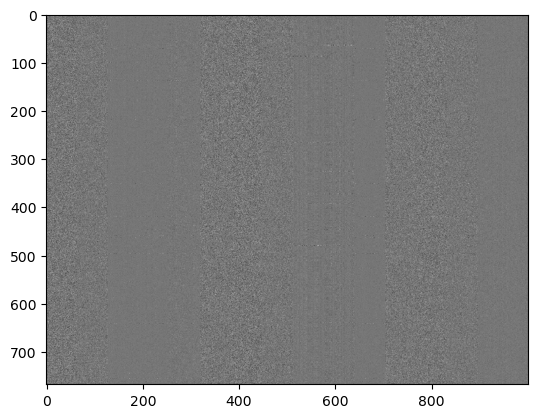

In [6]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:1000,:1000], cmap="gray")

In [7]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model=model_hf, tokenizer= tokenizer)
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}]

In [45]:
generator("Hello, I'm a language model,", max_length=1000, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, and I see how things like text and JSON parse our logic. So I just had to see if I was a decent linguist. And what I found is pretty difficult to get right; like, how to say things that are like a language, or like, text, but also do something that in turn is very different from a language like Spanish, how they're not just using the same language. And I guess the problem is like, and it's actually fairly easy to understand, is that when we do this sort of analysis, it's also really easy to understand what those kinds of assumptions would actually be and not just come to the conclusion that it's wrong.\n\nSo when we do that, for example, sometimes we can kind of come to terms with different meanings and that, I think, is a problem. And also, sometimes it's the situation where people just don't get it, like they just don't understand what the word is. We know it, but the problem is they don't understand that word. So, it's just, or it is

In [20]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
lol = "Ahh cool man"
print(enc.encode(lol))


[10910, 71, 3608, 582]


In [31]:
tokens = [15496, 11, 314, 1101, 257, 3303, 2746, 11] # "Hello, I'm a language model,"
tokens = torch.tensor(tokens, dtype=torch.long) # (8,)
tokens1 = tokens.unsqueeze(dim=0).repeat(5, 1) # (5, 8)
print(tokens1)

print()
tokens2 = tokens.unsqueeze(dim=1)
print(tokens2)

print(tokens2.view(1,-1))

tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11]])

tensor([[15496],
        [   11],
        [  314],
        [ 1101],
        [  257],
        [ 3303],
        [ 2746],
        [   11]])
tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11]])


In [47]:
# let's instead sample manually
import torch
from torch.nn import functional as F
import tiktoken

model = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
model.eval()
# model.to('cuda')
model.to('mps')
torch.manual_seed(42)
torch.cuda.manual_seed(42)
tokens = [15496, 11, 314, 1101, 257, 3303, 2746, 11] # "Hello, I'm a language model,"
tokens = torch.tensor(tokens, dtype=torch.long) # (8,)
tokens = tokens.unsqueeze(dim=0).repeat(5, 1) # (5, 8)
# x = tokens.to('cuda')
x = tokens.to('mps')

# generate!
while x.size(1) < 30: # max_length=30
    # forward the model to get the logits
    with torch.no_grad():
        logits = model(x)[0] # (B, T, vocab_size)
        # take the logits at the last position
        logits = logits[:, -1, :] # (B, vocab_size)
        # get the probabilities
        probs = F.softmax(logits, dim=-1)
        # do top-k sampling of 50 (huggingface pipeline default)
        # topk_probs here becomes (5, 50), topk_indices is (5, 50)
        topk_probs, topk_indices = torch.topk(probs, k=350, dim=-1)
        # select a token from the top-k probabilities
        # note: multinomial does not demand the input to sum to 1
        ix = torch.multinomial(topk_probs, 1) # (B, 1)
        # gather the corresponding indices
        xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
        # append to the sequence
        x = torch.cat((x, xcol), dim=1)

# print the generated text
import tiktoken
enc = tiktoken.get_encoding('gpt2')
for i in range(5):
    tokens = x[i, :].tolist()
    decoded = enc.decode(tokens)
    print(">", decoded)

KeyboardInterrupt: 

In [11]:
# tiny shakespeare dataset
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r') as f:
    text = f.read()
data = text[:1000] # first 1,000 characters
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [33]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [34]:
import torch
buf = torch.tensor(tokens[:24 + 1])
x = buf[:-1].view(4, 6)
y = buf[1:].view(4, 6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [35]:
print(sd_hf["lm_head.weight"].shape)
print(sd_hf["transformer.wte.weight"].shape)

torch.Size([50257, 768])
torch.Size([50257, 768])


In [42]:
sd_hf["transformer.wte.weight"]. shape


torch.Size([50257, 768])

In [37]:
(sd_hf["lm_head.weight"] == sd_hf["transformer.wte.weight"]).all()

tensor(True)

In [38]:
print(sd_hf["lm_head.weight"].data_ptr())
print(sd_hf["transformer.wte.weight"].data_ptr())

12884901888
12884901888


In [43]:

# standard deviation grows inside the residual stream
x = torch.zeros(768)
n = 100 # e.g. 100 layers
for i in range(n):
    x += n**-0.5 * torch.randn(768)

print(x.std())

tensor(0.9850)


In [ ]:
import torch

# super simple little MLP
net = torch.nn.Sequential(
    torch.nn.Linear(16, 32),
    torch.nn.GELU(),
    torch.nn.Linear(32, 1)
)
torch.random.manual_seed(42)
x = torch.randn(4, 16)
y = torch.randn(4, 1)
net.zero_grad()
yhat = net(x)
loss = torch.nn.functional.mse_loss(yhat, y)
loss.backward()
print(net[0].weight.grad.view(-1)[:10])

# the loss objective here is (due to readuction='mean')
# L = 1/4 * [
#            (y[0] - yhat[0])**2 +
#            (y[1] - yhat[1])**2 +
#            (y[2] - yhat[2])**2 +
#            (y[3] - yhat[3])**2
#           ]
# NOTE: 1/4!

In [ ]:
# now let's do it with grad_accum_steps of 4, and B=1
# the loss objective here is different because
# accumulation in gradient <---> SUM in loss
# i.e. we instead get:
# L0 = 1/4(y[0] - yhat[0])**2
# L1 = 1/4(y[1] - yhat[1])**2
# L2 = 1/4(y[2] - yhat[2])**2
# L3 = 1/4(y[3] - yhat[3])**2
# L = L0 + L1 + L2 + L3
# NOTE: the "normalizer" of 1/4 is lost
net.zero_grad()
for i in range(4):
    yhat = net(x[i])
    loss = torch.nn.functional.mse_loss(yhat, y[i])
    loss = loss / 4 # <-- have to add back the "normalizer"!
    loss.backward()
print(net[0].weight.grad.view(-1)[:10])


In [ ]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]
hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# load the log file
with open("log124M_40B/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

# Panel 1: losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'nanogpt ({sz}) val loss')
# horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(0.0, 4.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

# Panel 2: HellaSwag eval
plt.subplot(122)
xs, ys = streams_xy["hella"] # HellaSwag eval
ys = np.array(ys)
plt.plot(xs, ys, label=f"nanogpt ({sz})")
# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")
print("Max Hellaswag eval:", max(ys))

In [ ]:
import time
import torch

device = "mps"

torch.manual_seed(1234)
TENSOR_A_CPU = torch.rand(50000, 50000)
TENSOR_B_CPU = torch.rand(50000, 50000)

torch.manual_seed(1234)
TENSOR_A_MPS = torch.rand(50000, 50000).to(device)
TENSOR_B_MPS = torch.rand(50000, 50000).to(device)

# start_time = time.time()
# torch.matmul(TENSOR_A_CPU, TENSOR_B_CPU)
# print("CPU : --- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
torch.matmul(TENSOR_A_MPS, TENSOR_B_MPS)
print("MPS : --- %s seconds ---" % (time.time() - start_time))

In [ ]:
import torch.nn as nn
class Layer(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            *(nn.Linear(10000, 10000) for _ in range(10))
        )

    def forward(self, x):
        return self.linear(x)

def test_fp32():
    model = Layer().cuda()
    optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
    data = torch.ones(10000).cuda()
    for i in range(10):
        optimizer.zero_grad()
        output = model(data)
        loss = output.sum()
        loss.backward()
        optimizer.step()
        memory = max_memory_allocated()
        print(f'step memory allocate: {memory / 1e9:.3f}G')

def test_fp16():
    torch.cuda.init()
    model = Layer().cuda()
    optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
    data = torch.ones(10000).cuda()
    for _ in range(10):
        with autocast(device_type='cuda'):
            optimizer.zero_grad()
            output = model(data)
            loss = output.sum()
            loss.backward()
            optimizer.step()
        memory = max_memory_allocated()
        print(f'memory allocated: {memory / 1e9:.3f}G')

In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD

class Layer(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            *(nn.Linear(10000, 10000) for _ in range(10))
        )

    def forward(self, x):
        return self.linear(x)

def test_fp32():
    model = Layer().to('mps')
    optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
    data = torch.ones(10000).to('mps')
    
    for i in range(10):
        optimizer.zero_grad()
        output = model(data)
        loss = output.sum()
        loss.backward()
        optimizer.step()
        
        memory = torch.mps.current_allocated_memory()
        print(f'Step {i+1} memory allocated: {memory / 1e9:.3f}G')

def test_fp16():
    model = Layer().to('mps')
    optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
    data = torch.ones(10000).to('mps')
    
    for _ in range(3):
        optimizer.zero_grad()
        output = model(data.half())
        loss = output.sum()
        loss.backward()
        optimizer.step()
        
        memory = torch.mps.current_allocated_memory()
        print(f'Memory allocated: {memory / 1e9:.3f}G')

In [2]:
test_fp16()

: 

: 

: 